In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv(
    "../data/ml-100k/u.data",
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

ratings.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings.shape


(100000, 4)

In [4]:
ratings.describe()


,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
n_users = ratings["user_id"].nunique()
n_movies = ratings["movie_id"].nunique()

print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")


Number of users: 943
Number of movies: 1682


In [6]:
user_movie_matrix = ratings.pivot(
    index="user_id",
    columns="movie_id",
    values="rating"
)

user_movie_matrix.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
user_movie_matrix.isnull().sum().sum()


1486126

In [8]:
total_cells = user_movie_matrix.shape[0] * user_movie_matrix.shape[1]
filled_cells = ratings.shape[0]

sparsity = 1 - (filled_cells / total_cells)
print(f"Sparsity: {sparsity:.4f}")


Sparsity: 0.9370


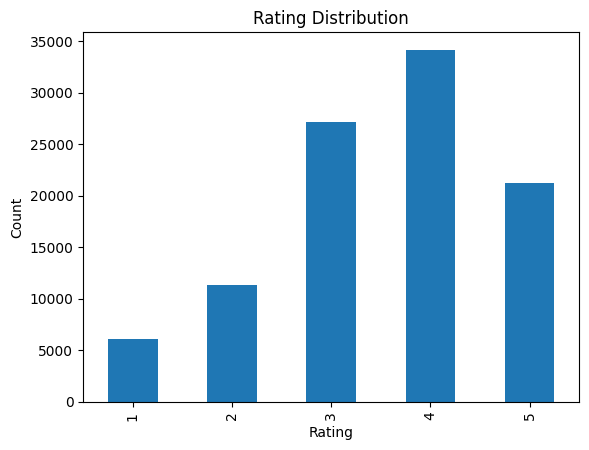

In [9]:
ratings["rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


In [10]:
ratings_per_user = ratings.groupby("user_id").size()

ratings_per_user.describe()


count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
dtype: float64

In [11]:
ratings_per_movie = ratings.groupby("movie_id").size()

ratings_per_movie.describe()


count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
dtype: float64